# COVID-19 Global Confirmed Cases and Fatalities Forecasting

**In this notebook, the model will be predicting the cumulative number of confirmed COVID19 cases in various locations across the world, as well as the number of resulting fatalities, for future dates.
We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv
/kaggle/input/covid19-global-forecasting-week-4/train.csv


**Loading Data**

In [3]:
train=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv')
test=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/test.csv')
submission=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/submission.csv')

**Visulalization of Distribution**

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

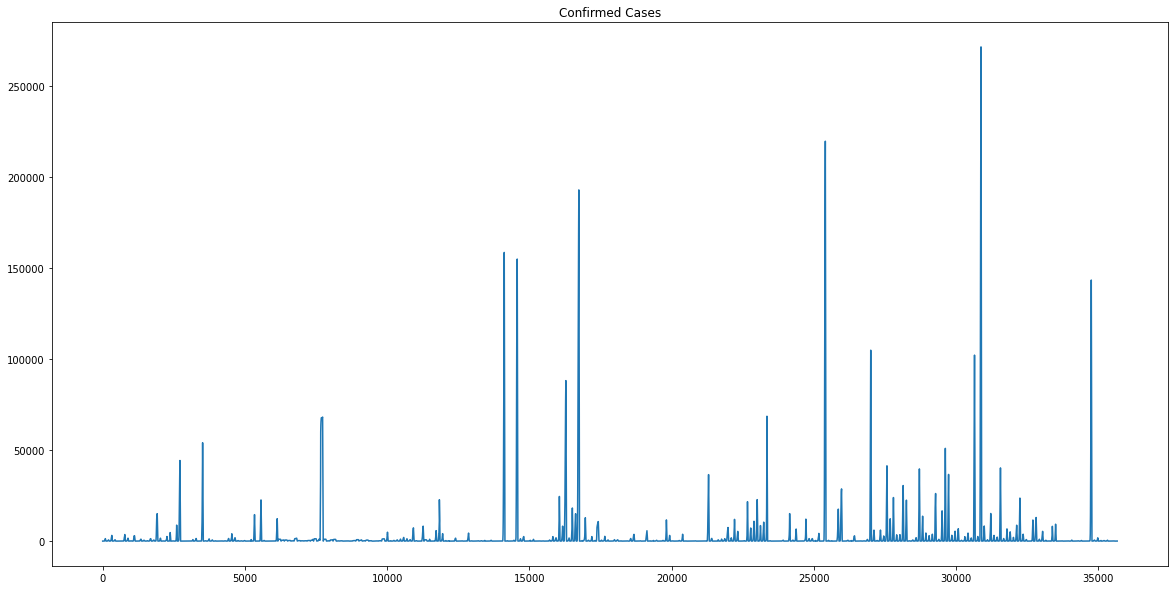

In [5]:
plt.figure(figsize=(20,10))
plt.plot(train.Id, train.ConfirmedCases)
plt.title('Confirmed Cases')
plt.show()

**Feature Engineering and Time Series Batch Creation by Country/Region to train them seperately, as trend is very different in different Regions**

In [6]:
X_train=train[['Id']]
test['Id']=test['ForecastId']
X_test=test[['Id']]
y_train_cc=train[['ConfirmedCases']]
y_train_ft=train[['Fatalities']]

In [7]:
X_tr=np.array_split(X_train,313)
y_cc=np.array_split(y_train_cc,313)
y_ft=np.array_split(y_train_ft,313)
X_te=np.array_split(X_test,313)

In [8]:
a=np.max(X_tr[0]).values
b=a-71
b=b[0]

In [9]:
X_te[0]=X_te[0]+a
for i in range (312):
    X_te[i+1]=X_te[0]  

In [10]:
for i in range (312):
    X_tr[i+1]=X_tr[0] 

**Building the Predictive Model and Iterate through Country/Region wise.**

In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
y_pred_cc=[]
for i in range (313): #for loop is used to iterate through different regions
    X_tr[i]=poly.fit_transform(X_tr[i])
    X_te[i]=poly.fit_transform(X_te[i])
    model=Lasso()
    model.fit(X_tr[i],y_cc[i]);
    y_pr_cc=model.predict(X_te[i])
    
    y_cc[i]= y_cc[i][71:]
    y_pr_cc=y_pr_cc[b:]
    y_pr_cc=np.append(y_cc[i], y_pr_cc)
    
    y_pred_cc.append(y_pr_cc);
   


In [12]:
y_pred_ft=[]
for i in range (313): #for loop is used to iterate through different regions
    model=Lasso()
    model.fit(X_tr[i],y_ft[i]);
    y_pr_ft=model.predict(X_te[i])
    
    y_ft[i]= y_ft[i][71:]
    y_pr_ft=y_pr_ft[b:]
    y_pr_ft=np.append(y_ft[i], y_pr_ft)
   
    y_pred_ft.append(y_pr_ft);

In [13]:
y_pred_ft_1 = [item for sublist in y_pred_ft for item in sublist]
y_pred_cc_1 = [item for sublist in y_pred_cc for item in sublist]

**Readiness for Submission File**

In [14]:
result=pd.DataFrame({'ForecastId':submission.ForecastId, 'ConfirmedCases':np.round(y_pred_cc_1), 'Fatalities':np.round(y_pred_ft_1)})
result.to_csv('/kaggle/working/submission.csv', index=False)
data=pd.read_csv('/kaggle/working/submission.csv')
data.head(50)

,ForecastId,ConfirmedCases,Fatalities
0,1,273.0,6.0
1,2,281.0,6.0
2,3,299.0,7.0
3,4,349.0,7.0
4,5,367.0,11.0
5,6,423.0,14.0
6,7,444.0,14.0
7,8,484.0,15.0
8,9,521.0,15.0
9,10,555.0,18.0


**#StayHome #StaySafe #May Almighty bless us All.**

**Please upvote if you like this or find this notebook useful, Thanks.**